In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.4
pandas 1.0.3
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


4423680/4422102 [==============================] - 1s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


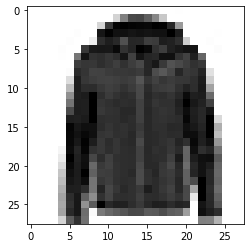

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
show_single_image(x_train[0])

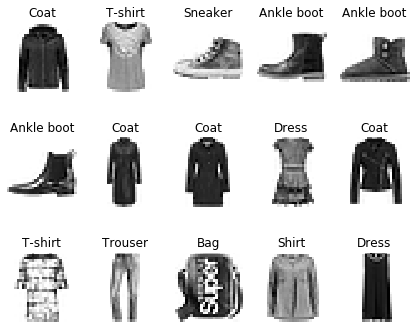

In [9]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize= (n_rows * 2.4, n_cols * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_images(3, 5, x_train, y_train, class_names)

In [21]:
# tf.keras.models.Sequential()
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
# relu: y = max(0, x)
# softmax: 将向量变成概率分布。
# x = [x1, x2, x3]
# y = [e^x1/sum, e^x2/sum, e^x3/sum],   sum = e^x1 + e^x2 + e^x3

# reason for sparse:
# 若y是index(一维index值)，则用sparse转为向量    sparse_categorical_crossentropy
# 若y是one_hot(即y已经是向量)，则不需要sparse    categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.layers


In [22]:
model.summary()

# [None, 784] * W + b -> [None, 300],  W.shape [784, 300], b.shape [300]    784 * 300 + 300 = 235500

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 76us/sample - loss: 2713.6912 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 2/10
55000/55000 [==============================] - 4s 67us/sample - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 3/10
55000/55000 [==============================] - 4s 67us/sample - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 4s 70us/sample - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 6/10
55000/55000 [==============================] - 4s 66us/sample - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [==============================

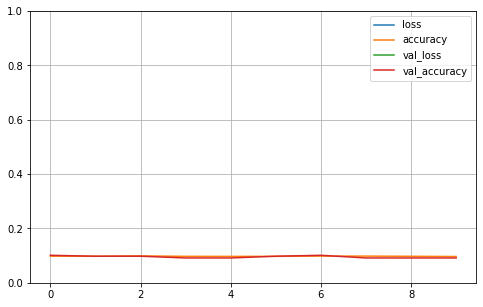

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8, 5])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)